<a href="https://colab.research.google.com/github/sunilsunny101/AIRBNB-BOOKING-ANALYSIS/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Fetching csv file from drive path


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/alma better/capstone project EDA/Copy of Airbnb NYC 2019.csv')

Data cleansing.

lets get the summary of the dataset 

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are total four columns with null values.

name column is having total 16 null values.

host_name is having 21 null values.

last_review and reviews_per_month are having more null values.

we will look at the columns and decide what we can do with them

Now, we drop unnecessary columns such as   host_name, last_review.

In [6]:
df.drop(['host_name','last_review'],axis = 1 ,inplace = True)

Replacing all null values in reviews per month column with zero.

Replacing all null values in name column with the values in room type column 

In [7]:
df['reviews_per_month'].replace(np.nan,0,inplace = True)
df['name'].fillna(df['room_type'],inplace=True)

In [8]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

We haven’t missed value anymore.

Exploration Data and Visualizing

Now time to explore our data and visualize it to examine the relationship between the columns data.

Lets start with Scatter Plot to show the neighbourhood group based on Latitude and Longitude.

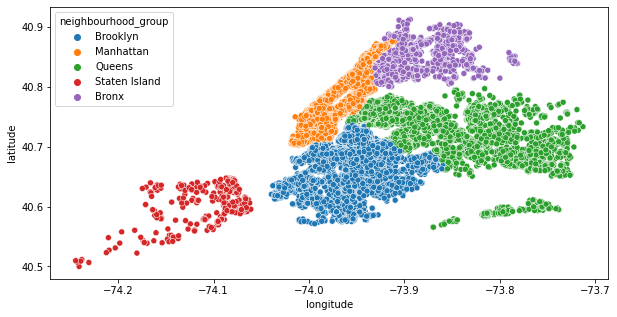

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)


**Neighbourhood** **group**

In [11]:
neighbour_df = df.groupby('neighbourhood_group')['id'].count()

Text(0.5, 0, 'neighbourhood_group')

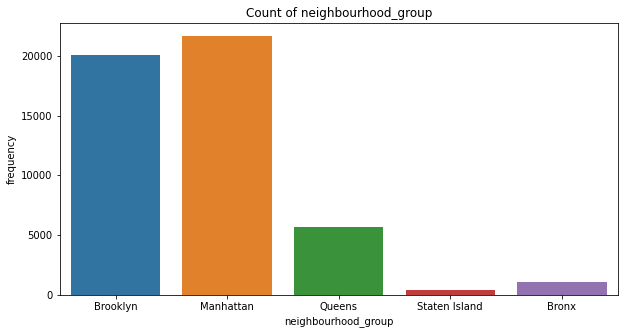

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group',data = df)
plt.title('Count of neighbourhood_group')
plt.ylabel('frequency')
plt.xlabel('neighbourhood_group')


Observations:

1.Brooklyn and Manhattan have the highest hotel/room bookings.

Apart from knowing the frquency of rooms availability,we can also explore the average booking prices in these localities

**Relation between neighbourhood group and average price**

In [16]:
avg_priceof_neigh_df = df.groupby(['neighbourhood_group']).agg({'price':'mean'}).reset_index().rename(columns={'price':'average price'})

Text(0, 0.5, 'Average_price')

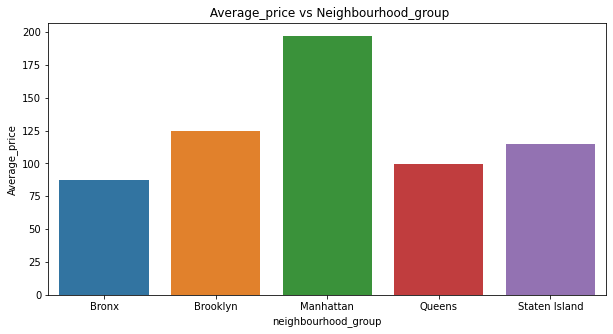

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'neighbourhood_group',y = 'average price',data = avg_priceof_neigh_df)
plt.title(' Average_price vs Neighbourhood_group')
plt.xlabel('neighbourhood_group')
plt.ylabel("Average_price")


1. Manhattan is the area having highest average booking price,followed by Brooklyn.
2. Bronx is the area having lowest average booking price.

**Neighbourhood**

In [18]:
neigh_counts_df = df['neighbourhood'].value_counts().reset_index().rename(columns={'index':'neighbourhood','neighbourhood':'counts'})

In [19]:
neigh_counts_df

,neighbourhood,counts
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


Observations:

1.There are 221 unique neighborhoods.

In [20]:
top10_neighbourhoods = neigh_counts_df.head(10)

In [21]:
top10_neighbourhoods

,neighbourhood,counts
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


Text(0, 0.5, 'Count')

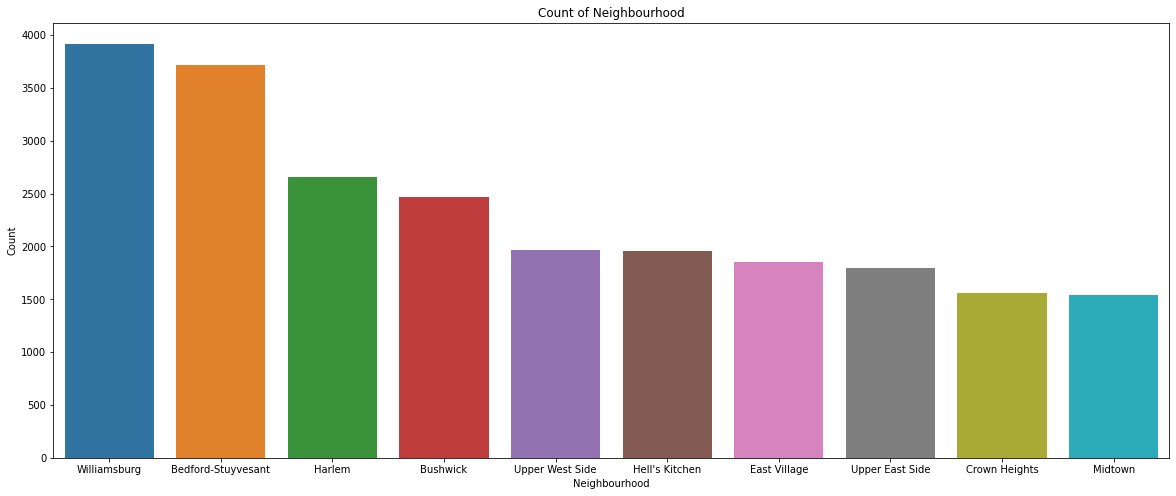

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x='neighbourhood',y='counts',data = top10_neighbourhoods)
plt.title('Count of Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')

Observations:

1.The above plot shows us the top 10  Neighbours towns where  customers were interested to stay.


**Room Details**

In [23]:
room_df = df['room_type'].value_counts().reset_index().rename(columns={'index':'Room type','room_type':'count of no of hotels'})

In [24]:
room_df

,Room type,count of no of hotels
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


Text(0, 0.5, 'Count')

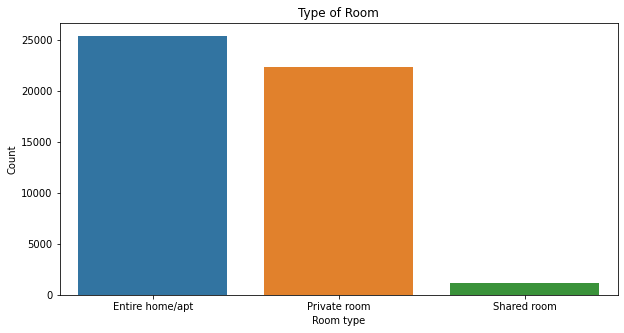

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='Room type',y='count of no of hotels',data =room_df)

plt.title('Type of Room')
plt.xlabel('Room type')
plt.ylabel('Count')

1. Majority of customers were interested in booking entire home/apt.
2. As expected very few customers were interested in sharing room type.

**We can further analyse the room types occupied by a neighborhood group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


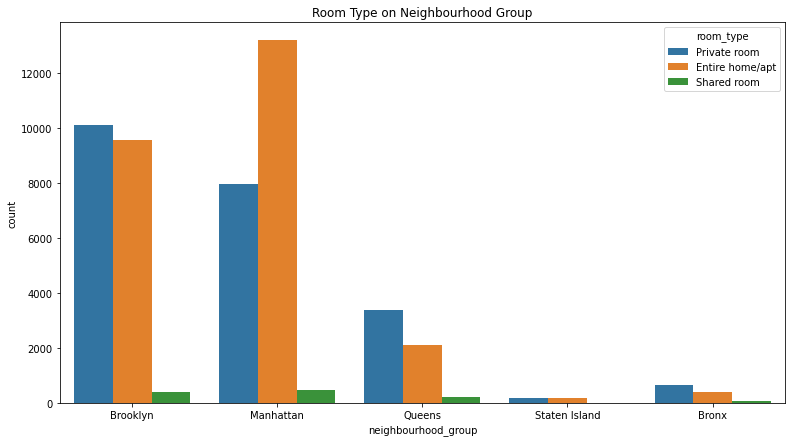

In [26]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue= df.room_type)

Now its time to analyse the price variations of these room types

Text(0, 0.5, 'Price')

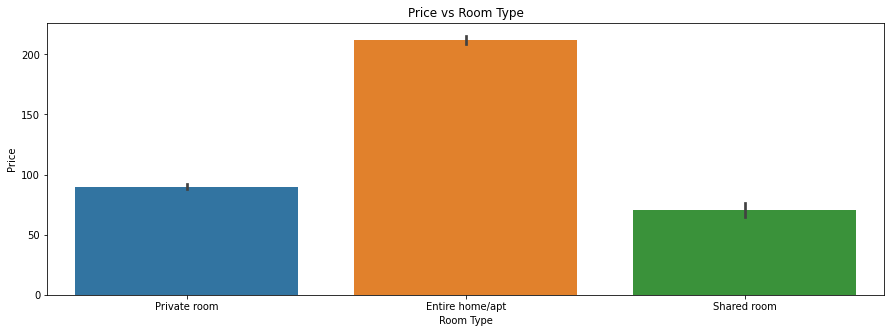

In [27]:
plt.figure(figsize = (15,5))
sns.barplot(x= 'room_type',y= 'price', data=df)
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel("Price")


Despite being costlier than other room types 'Entire home/apt', majority of customers were interested to choose this.

**Now to get even more understanding of how price is varrying in neighbourhood for various room types lets create and analyse the dataset.**

In [28]:
neigh_room_df_unstacked_table = pd.pivot_table(( df.groupby(['neighbourhood','room_type']).agg({'price':'sum'})), values='price', index=['neighbourhood'], columns=['room_type'])

In the above code line we had done the groupby operation on two columns by the variable price column and we unstacked the data for proper visualalization.

In [29]:
neigh_room_df_unstacked_table.head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Allerton,1969.0,1710.0,NaN
Arden Heights,228.0,41.0,NaN
Arrochar,1897.0,518.0,NaN
Arverne,10782.0,2369.0,76.0
Astoria,54178.0,47512.0,3779.0


Now its time to find the maximum and minimum revenue genrated by each room type in the neighbours.

In [30]:
x = neigh_room_df_unstacked_table.sort_values('Entire home/apt',ascending=False).head(1)
y = neigh_room_df_unstacked_table.sort_values('Entire home/apt',ascending=True).head(1)
a = neigh_room_df_unstacked_table.sort_values('Private room',ascending=False).head(1)
b = neigh_room_df_unstacked_table.sort_values('Private room',ascending=True).head(1)
c = neigh_room_df_unstacked_table.sort_values('Shared room',ascending=False).head(1)
d = neigh_room_df_unstacked_table.sort_values('Shared room',ascending=True).head(1)

In [31]:
print(f'the maximum revenue generated by Entire home/apt is \n {x}' )
print('------------------------------------------------------------------')
print(f'the minimum revenue generated by Entire home/apt is \n {y}' )

print('\n*************************************************************************\n')

print(f'the maximum revenue generated by private room is \n {a}' )
print('------------------------------------------------------------------')
print(f'the minimum revenue generated by private room  is \n {b}' )

print('\n*************************************************************************\n')

print(f'the maximum revenue generated by Shared room is \n {c}' )
print('------------------------------------------------------------------')
print(f'the minimum revenue generated by Shared room  is \n {d}' )

the maximum revenue generated by Entire home/apt is 
 room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0
------------------------------------------------------------------
the minimum revenue generated by Entire home/apt is 
 room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
New Dorp                  57.0           NaN          NaN

*************************************************************************

the maximum revenue generated by private room is 
 room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0
------------------------------------------------------------------
the minimum revenue generated by private room  is 
 room_type      Entire home/apt  Private room  Shared room

So from the above outputs, the neighbourhood **'Williamsburg'** has generated highest revenue for Entire home/apt and Private room types.
The reason behind this may be the presence of tourist places near this neighbourhood



# **Lets find out which type of rooms are mostly available through out the year**

In [32]:
availability_365 =df.groupby(['room_type'])['availability_365'].count().reset_index()

Text(0, 0.5, 'availability of rooms in a year')

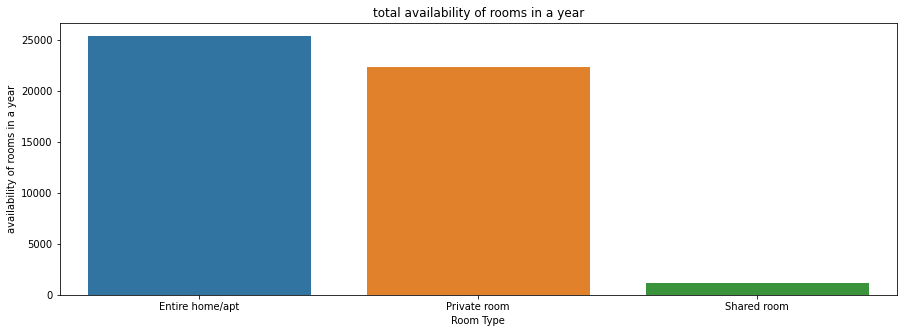

In [33]:

plt.figure(figsize = (15,5))
sns.barplot(x= 'room_type',y= 'availability_365', data=availability_365)
plt.title('total availability of rooms in a year')
plt.xlabel('Room Type')
plt.ylabel("availability of rooms in a year")

Till now i assumed that customers were preferring entire home/apt over shared rooms because of their personal interest but the fact from the above analysis shows the availability of rooms throught the year.
As we can interpret that the shared rooms are less available comapred to the remaining two room types.

# **Lets group the rooms by their price**

lets create column to classfity the properties listed on airbnb using price cl=olumn

In [34]:
def price_category(price):
  if price<=100:
    return 'cheap'
  elif price>=100 and price<=500:
    return '3 star hotel'
  else:
    return '5 star hotel'

df['property_type'] = df['price'].apply(lambda x :price_category(x))

Now group by the property type column based on the minimum nights spent in that property.

By doing this we get to know which price range properties are frequently booked.

In [35]:
most_booked_room_df = df.groupby(['property_type'])['minimum_nights'].sum().reset_index().rename(columns={'minimum_nights':'total_no_of_nights_spent'})

In [36]:
most_booked_room_df

,property_type,total_no_of_nights_spent
0,3 star hotel,184934
1,5 star hotel,9656
2,cheap,149140


Text(0.5, 1.0, 'Property type vs total nights spent')

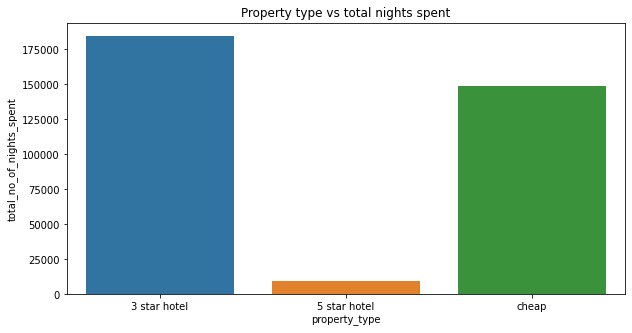

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=most_booked_room_df['property_type'], y =most_booked_room_df['total_no_of_nights_spent'],data =most_booked_room_df)
plt.title('Property type vs total nights spent')


3 star hotels has most demand in the NYC area when compared to other two room types

# **Lets get the names of top 5 propeties, based on their reviews count**

Based on the review score(Minimum 50) we will plot, who is our top 5 Host, this increases the confidence of tourist before booking.

In [91]:
reviews_grt50 = df[df['number_of_reviews']>=50]

top5_df = reviews_grt50.groupby(['host_id'])['number_of_reviews'].sum().sort_values(ascending = False).reset_index()[:5]

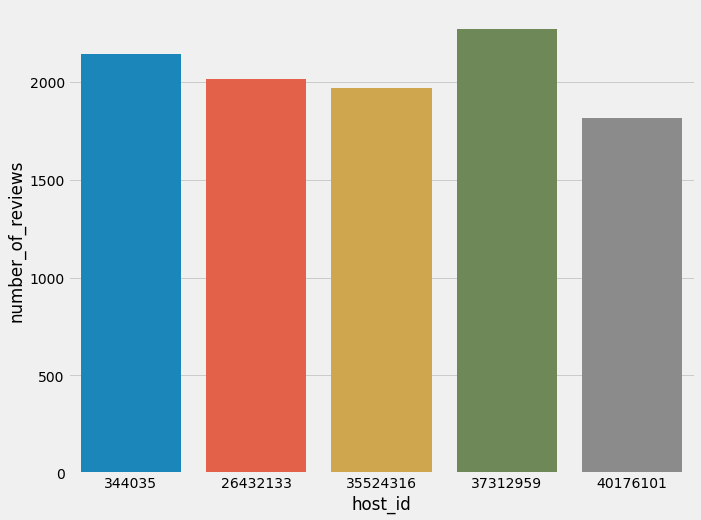

In [92]:
plt.figure(figsize=(10,8))
sns.barplot(x=top5_df['host_id'],y=top5_df['number_of_reviews'],data = top5_df)


Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking.So far the host with host id has 37312959 has more number reviews.

One thing we cannot conclude here is whether the reviwes are positive or negative.

#**Lets jump into the insights of daily bookings of room types throughout the year**

In [38]:
df.groupby(['room_type','availability_365']).agg({'minimum_nights':'sum'}).unstack()

minimum_nights                                              \
availability_365            0       1      2       3      4      5      6     
room_type                                                                     
Entire home/apt         44975.0  1621.0  968.0  1078.0  837.0  875.0  603.0   
Private room            35793.0  1089.0  371.0   343.0  243.0  494.0  317.0   
Shared room              1445.0    14.0    4.0     5.0    8.0   13.0   64.0   

                                       ...                               \
availability_365    7      8      9    ...    356    357     358    359   
room_type                              ...                                
Entire home/apt   765.0  652.0  560.0  ...  206.0  529.0  1409.0  211.0   
Private room      346.0  310.0  173.0  ...  196.0  298.0  1560.0  283.0   
Shared room        35.0    2.0    4.0  ...    2.0   34.0    41.0    7.0   

                                                                 
availability_365    360    361     362     363     364      365  
room_type                                                        
Entire home/apt   240.0  141.0  2663.0  1844.0  5485.0  16861.0  
Private room      235.0  488.0   410.0   768.0  1833.0   6414.0  
Shared room        38.0   15.0    20.0    28.0    77.0   2107.0  

[3 rows x 366 columns]

As we can see from the above data frame that irrespective of room types the zero night bookings are highest 

In [39]:
df.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


From above table we can see the maximum price of a hotel is 10000$,where as its  75% value is around 230$.

So for better visualisation,we consider only those rows whose price is less than 2000$.

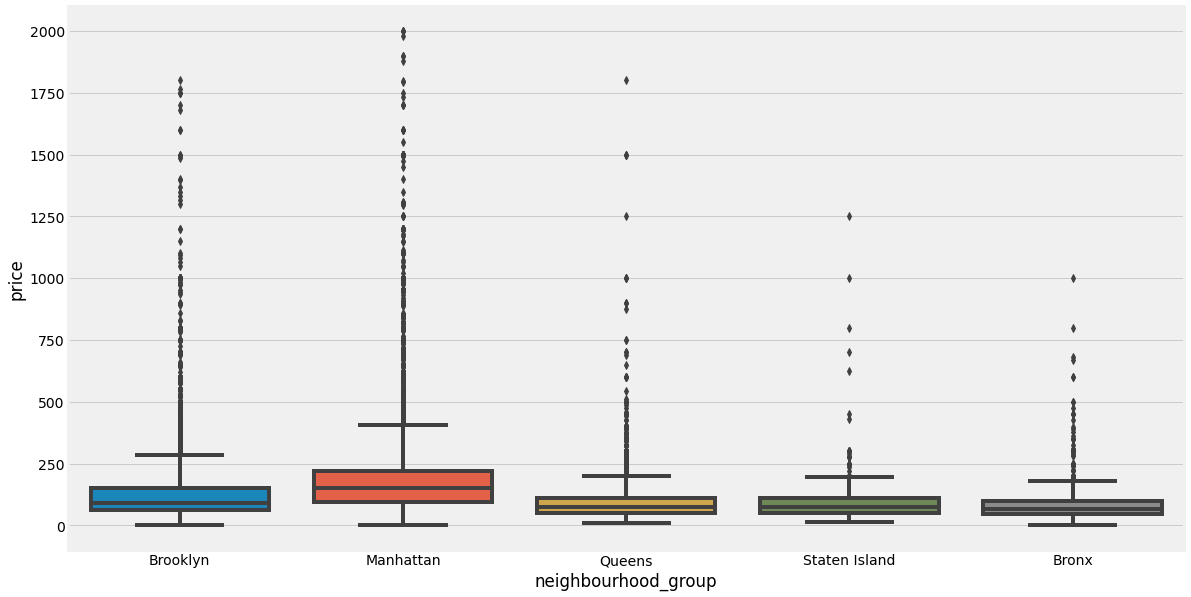

In [40]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
df_new =  df[df['price']<2000]
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=df_new)

The above box plot signifies that neighbourhood 'Manhattan' has maximum prices,followed by 'Brooklyn'.

Lets look into the hosts who has multiple properties(more than 50) and compare with remainig hosts.

In [41]:
no_of_properties_df1 = df[(df['calculated_host_listings_count']>=50)]

In [42]:
no_of_properties_df1['calculated_host_listings_count'].sort_values(ascending = False).value_counts().reset_index()
x = no_of_properties_df1['host_id'].value_counts().idxmax()
y = no_of_properties_df1['calculated_host_listings_count'].value_counts().idxmax()

In [43]:
print(f'The maximum no of properties are held by the host with host id as {x} \nThe total no of properties are {y}')

The maximum no of properties are held by the host with host id as 219517861 
The total no of properties are 327


Lets compare the average prices set by the hosts who have more than 50 properties with rest of them.

Before begining our analysis we need to separate the data sets.

Here we are comparing the hosts with no of properties greater than 50 with the avg stay of customers in their properties.

In [44]:
minimum_nights_of_top_hosts_grt50 =no_of_properties_df1.groupby('room_type')['minimum_nights'].mean().reset_index().rename(columns={'room_type':'room_type_grt50','minimum_nights':'minimum_nights_grt50'}).round(0)
minimum_nights_of_top_hosts_grt50['minimum_nights_grt50'] = minimum_nights_of_top_hosts_grt50['minimum_nights_grt50'].astype(int)

The above line of code represets the creation of data set with hosts who have properties greater than 50 and calculating the mean of minimum no of stays in their properties

In [45]:
minimum_nights_of_rest =  df[(df['calculated_host_listings_count']<50)].groupby('room_type')['minimum_nights'].mean().reset_index().rename(columns={'room_type':'room_type_rest','minimum_nights':'minimum_nights_rest'}).round(0)
minimum_nights_of_rest['minimum_nights_rest']= minimum_nights_of_rest['minimum_nights_rest'].astype(int)

The above line of code represets the creation of data set with hosts who have properties less than 50 and calculating the mean of minimum no of stays in their properties

In [46]:
list_ =[minimum_nights_of_top_hosts_grt50,minimum_nights_of_rest ]
min_nights_df = pd.concat(list_,axis=1)
min_nights_df.drop(2,inplace = True)

Concatinating the two data sets and dropping the values which are null

In [47]:
min_nights_df

,room_type_grt50,minimum_nights_grt50,room_type_rest,minimum_nights_rest
0,Entire home/apt,27.0,Entire home/apt,8
1,Private room,28.0,Private room,5


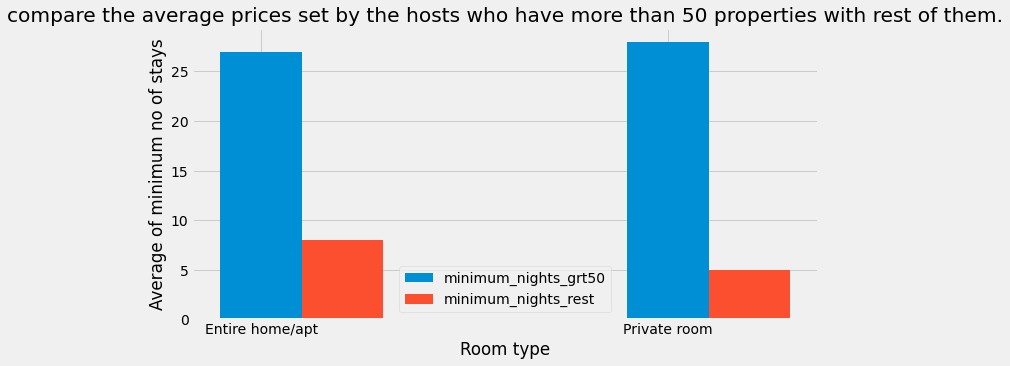

In [48]:
plt.figure(figsize = (10,5))
room_type_list = min_nights_df['room_type_grt50'].tolist()
minimum_nights_grt50 = min_nights_df['minimum_nights_grt50'].tolist()
minimum_nights_rest = min_nights_df['minimum_nights_rest'].tolist()
bar1 = [1,2]
bar2 = [i+0.2 for  i in bar1]
plt.bar(bar1,minimum_nights_grt50,0.2,label = 'minimum_nights_grt50')
plt.bar(bar2,minimum_nights_rest,0.2,label = 'minimum_nights_rest')
plt.title('compare the average prices set by the hosts who have more than 50 properties with rest of them.')
plt.xticks(bar1,room_type_list)
plt.xlabel('Room type')
plt.ylabel('Average of minimum no of stays')
plt.legend()

The reason to do this analysis was to find atleast one factor why the hosts with grater than 50 properties are able to expand their business.

So one of the factor might be the minimum no of nights the customers are staying at their properties is way larger in comparision to rest.

They might be providing  their customers with large varitey of complimentary facilities  which will eventually forces the customer to stay there.